# Load an analyze data

### Adèle Gillier and Adrien Le Franc
### Challenge data ENS

In [1]:
import numpy as np
import pandas as pd
import math
import time
import codecs
import re
import itertools as it

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
file_train = "./data/train_input.csv"
file_output = "./data/challenge_output.csv"

In [7]:
def check_buildings_variables(data_dico):
    """ Check if all the buildings have the same variables """
    
    building0 = list(data_dico.keys())[0]
    variables = list(data_dico[building0].keys())
    same_variables = True
    
    for x in data_dico:
        if list(data_dico[x].keys()) != variables:
            same_variables = False
    return same_variables

def load_input_data(file):
    ## -- Load data --
    data = codecs.open(file, 'r', encoding='utf-8')
    data = data.read()
    data = data.splitlines()
    
    ## -- Load outside temperature --
    outside_temp = []
    i = 0
    if data[i] == "outside_temperature_degreC":
        is_number = True
        i += 1
        while is_number:
            try:
                outside_temp.append(float(data[i]))
                i += 1
            except:
                is_number = False 
    data = data[i:]
    
    ## -- Load parameters of the buildings --
    data_dico = {}
    num_building = None

    for x in data:
        if x[:8] == "building":  # Parameter of a new building
            num_building = x.replace(' ', '')
            data_dico[num_building] = {}
        else:
            name_var = re.findall('[^:]*:', x)[0][:-1]  # Name of the variable
            values_var = re.findall('(?<=:).*', x)[0]
            if '[' in values_var and ']' in values_var:  # The value of the variable is a list
                values_var = values_var.replace('[', '')
                values_var = values_var.replace(']', '')
                values_var = values_var.split(',')
                values_var = [float(y) for y in values_var]
            else:   # The value of the variable is juste a float
                values_var = float(values_var)
            data_dico[num_building][name_var] = values_var
            
    same_variables = check_buildings_variables(data_dico)
    if not same_variables:
        print("PROBLEM: the buildings have not the same parameters")
        
    return outside_temp, data_dico

In [28]:
outside_temp, data_dico = load_input_data(file_train)

len_year = len(outside_temp)
buildings = list(data_dico.keys())

* **data_dico**: dictionnaire des réglages de chaque batiment. Le clé est le nom du batiment ('building_10_0' par exemple) et ensuite chaque batiment est un dictionnaire des valeurs de tous les paramètres
* ** outside_temp** ets juste une liste des température extérieure par heure

In [29]:
print("{} buildings in the train dataset".format(len(buildings)))
print("{} parameters by building \n\nThe variables are:".format(len(data_dico['building_10_0'].keys())))
print(list(data_dico['building_10_0'].keys()))

240 buildings in the train dataset
46 parameters by building 

The variables are:
['ventilation_week_hours', 'ventilation_week_ONif1', 'AC_week_hours', 'AC_week_temperatures_degreC', 'AC_WE_hours', 'AC_WE_temperatures_degreC', 'AC_monday_hours', 'AC_monday_temperatures_degreC', 'heating_week_hours', 'heating_week_temperatures_degreC', 'heating_WE_hours', 'heating_WE_temperatures_degreC', 'heating_monday_hours', 'heating_monday_temperatures_degreC', 'thickness_ground_m', 'thickness_outwall_m', 'thickness_intwall_m', 'thickness_intfloor_m', 'thickness_roof_m', 'airchange_infiltration_m3perh', 'airchange_ventilation_m3perh', 'AC_power_kW', 'heating_power_kW', 'window_percent_1_outwall', 'surface_1_m2_OUTW', 'window_percent_2_outwall', 'surface_2_m2_OUTW', 'window_percent_3_outwall', 'surface_3_m2_OUTW', 'surface_m2_GROU', 'surface_m2_ROOF', 'window_percent_4_outwall', 'surface_4_m2_OUTW', 'surface_m2_INTW', 'nb_occupants', 'nb_PCs', 'PCs_percent_on_night_WE', 'light_percent_on_night_WE', 

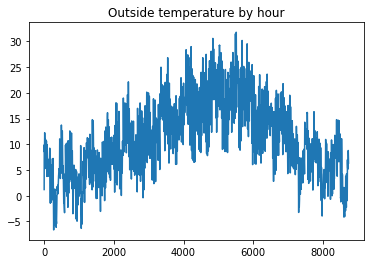

In [5]:
plt.plot(outside_temp)
plt.title('Outside temperature by hour')
plt.show()

### Output data

In [88]:
## -- Load output data --
output = pd.read_csv(file_output, sep=":")

output_dico = {}

for i in range(len(buildings)):
    output_dico[buildings[i]] = output.iloc[len_year*i:len_year*(i+1)]

In [89]:
output_dico['building_10_0'].head()

,office_temperature_degreC,Q_total_heating_kW,Q_total_AC_kW,Q_total_gains_kW,Q_total_kW
0,20.000000,0.0,0.0,0.00000,192.89000
1,19.841633,0.0,0.0,20.03876,212.92876
2,19.577957,0.0,0.0,20.03876,212.92876
3,19.372225,0.0,0.0,20.03876,212.92876
4,19.175364,0.0,0.0,20.03876,212.92876


* ** output_dico** contient pour chaque nome de batiment, un dataframe contenant les 4 variables de sortie

In [100]:
output_var = list(output_dico[buildings[num_building]].columns)
output_var

['office_temperature_degreC',
 'Q_total_heating_kW',
 'Q_total_AC_kW',
 'Q_total_gains_kW',
 'Q_total_kW']

# Analyse des outputs

In [68]:
def plot_output_var(name_var, name_building='building_10_0'):
    output_dico[name_building][name_var].plot()
    plt.title(name_var)
    plt.xlabel('Hour')
    plt.show()

### 1. office_temperature_degreC :  inside temperatures

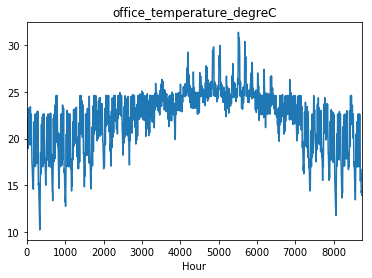

In [69]:
plot_output_var('office_temperature_degreC')

** Remarques:**
* Une sorte de palier à 25 en dehors de l'été ?? -> il semblerait que le chauffage soit max à 25, et cette température n'est dépassée que si la température extérieure est élevée

### 2. Q_total_heating_kW : heating consumptions

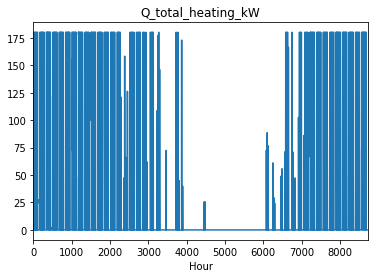

In [96]:
plot_output_var('Q_total_heating_kW')

In [95]:
np.min(output_dico['building_10_0']['Q_total_heating_kW']), np.max(output_dico['building_10_0']['Q_total_heating_kW'])

(0.0, 180.09)

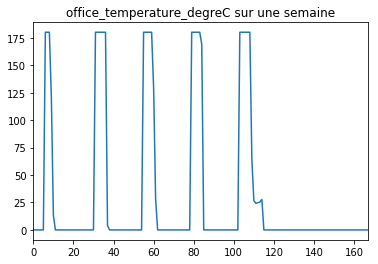

In [98]:
## Sur une semaine
output_dico['building_10_0']['Q_total_heating_kW'].iloc[:7*24].plot()
plt.title('office_temperature_degreC sur une semaine')
plt.show()

** Remarques**:
* Variable comprise entre 0 et 180.09
* Fonctionne par palier

### 3. Q_total_AC_kW : AC consumptions

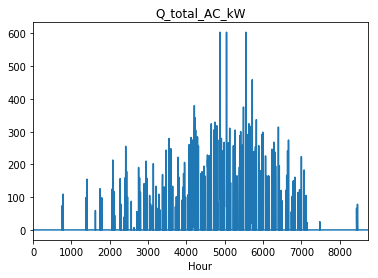

In [72]:
plot_output_var('Q_total_AC_kW')

### 4. Q_total_gains_kW  : free heating from lighting, people etc...

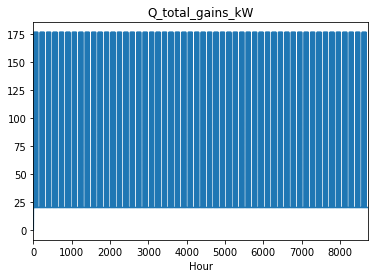

In [73]:
plot_output_var('Q_total_gains_kW')

In [74]:
np.unique(output_dico['building_10_0']['Q_total_gains_kW'])

array([   0.     ,   20.03876,  176.7376 ])

**Que trois valeurs possibles!**

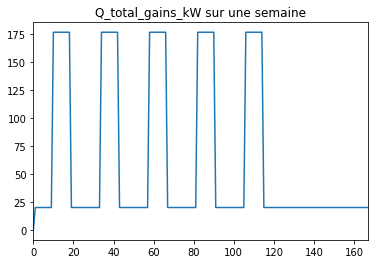

In [81]:
output_dico['building_10_0']['Q_total_gains_kW'][:7*24].plot()
plt.title('Q_total_gains_kW sur une semaine')
plt.show()

Text(0.5,1,'Q_total_gains_kW sur une journée de semaine')

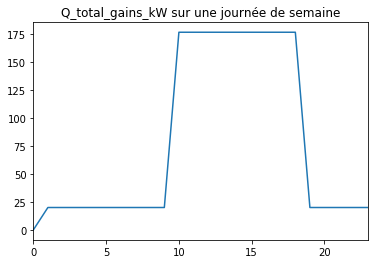

In [78]:
output_dico['building_10_0']['Q_total_gains_kW'][:24].plot()
plt.title('Q_total_gains_kW sur une journée de semaine')

In [92]:
print(output_dico['building_10_0']['Q_total_gains_kW'][0])
values = np.unique(output_dico['building_10_0']['Q_total_gains_kW'][1:])

only_2_values = len(values) == 2
for building in buildings:
    if len(np.unique(output_dico[building]['Q_total_gains_kW'][1:])) != 2\
       and output_dico[building]['Q_total_gains_kW'][0] == 0:
        only_2_values = False

if only_2_values:
    print("Valeurs possibles:", values)

0.0
Valeurs possibles: [  20.03876  176.7376 ]


Il n'y a en fait **que deux valeurs possibles pour la variables 'Q_total_gains_kW'** si l'on ne regarde pas la toute première valeur qui vaut elle 0.

### 5. Q_total_kW : total consumption

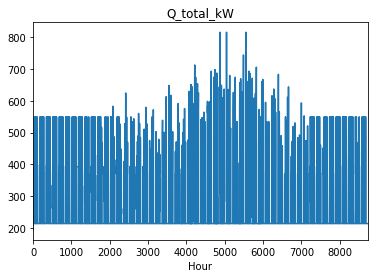

In [99]:
plot_output_var('Q_total_kW')

In [101]:
output_var

['office_temperature_degreC',
 'Q_total_heating_kW',
 'Q_total_AC_kW',
 'Q_total_gains_kW',
 'Q_total_kW']

In [106]:
np.all(output_dico['building_10_0']['Q_total_kW'] == output_dico['building_10_0']['Q_total_heating_kW'] + \
                                                     output_dico['building_10_0']['Q_total_AC_kW'] + \
                                                     output_dico['building_10_0']['Q_total_gains_kW'])

False

In [110]:
test = output_dico['building_10_0']['Q_total_heating_kW'] + output_dico['building_10_0']['Q_total_AC_kW'] + \
       output_dico['building_10_0']['Q_total_gains_kW']

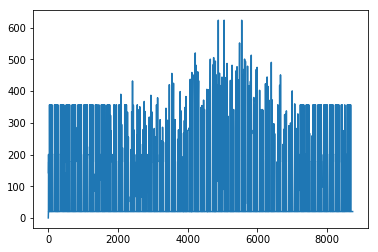

In [112]:
plt.plot(test)
plt.show()

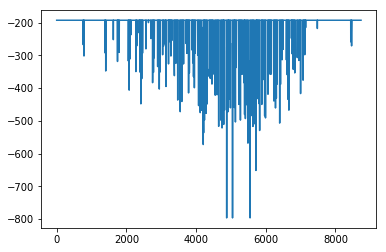

In [125]:
diff = output_dico['building_10_0']['Q_total_heating_kW'] + output_dico['building_10_0']['Q_total_AC_kW'][1] + \
output_dico['building_10_0']['Q_total_gains_kW'] - output_dico['building_10_0']['Q_total_kW']

plt.plot(diff)

**Remarques:**
* Meme tendance que la somme de toutes les variables de consommations mais c'est pas ça...